In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("./datasets/pollutant.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [63]:
df.nunique()

Ozone       67
Solar.R    117
Wind        31
Temp        40
Month        5
Day         31
dtype: int64

In [64]:
df.isnull().sum() / len(df) * 100

Ozone      24.183007
Solar.R     4.575163
Wind        0.000000
Temp        0.000000
Month       0.000000
Day         0.000000
dtype: float64

In [65]:
df = df.dropna()

In [99]:
x = df[['Wind']].values
y = df['Temp'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [100]:
print(x_train.shape)
print(y_train.shape)

(88, 1)
(88,)


In [101]:
lr = LinearRegression()

In [102]:
lr.fit(x_train,y_train)

LinearRegression()

In [104]:
lr.predict([[7.4]])

array([81.33929119])

In [106]:
pd.DataFrame(lr.coef_, ['Wind'], columns = ['Coeff'])

,Coeff
Wind,-1.301602


In [107]:
prediction = lr.predict(x_test)

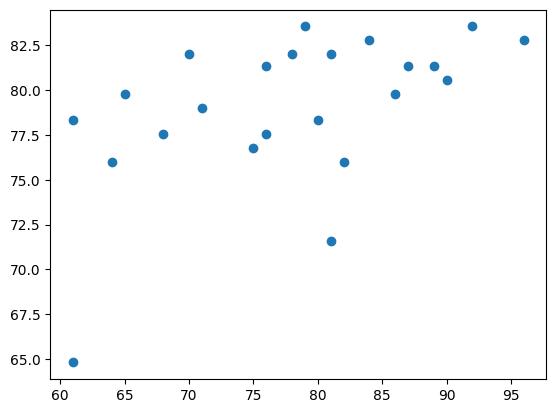

In [108]:
plt.scatter(y_test,prediction)

In [109]:
import pickle

with open("./regression_model.pkl",'wb') as file:
    pickle.dump(lr,file)